<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Machine_Learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN-Model

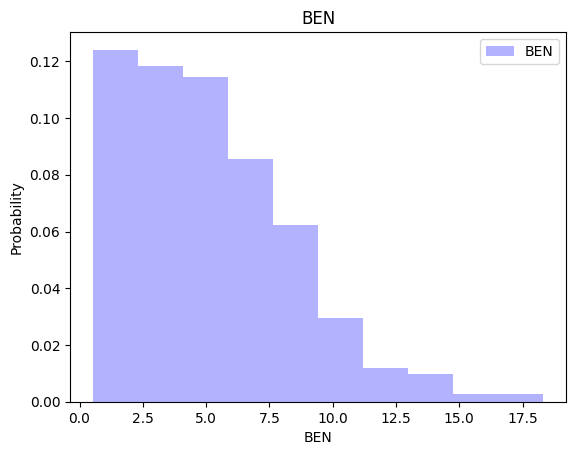

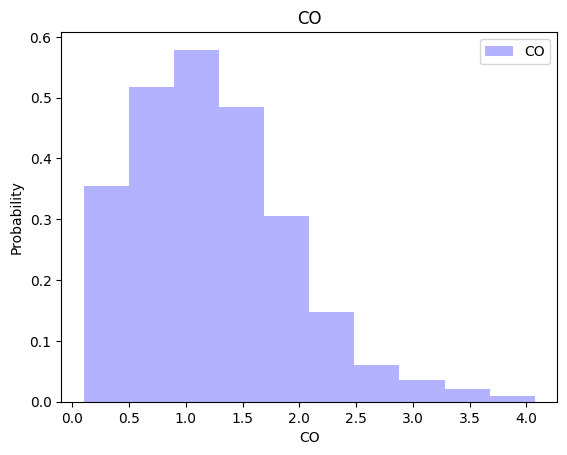

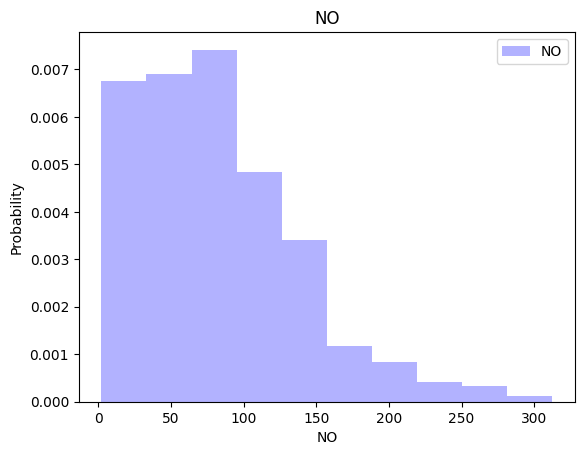

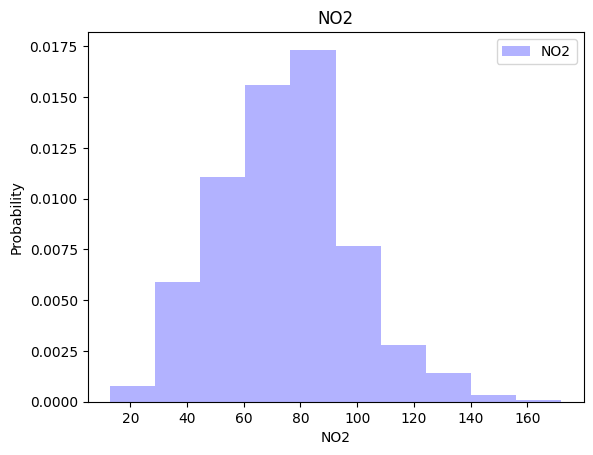

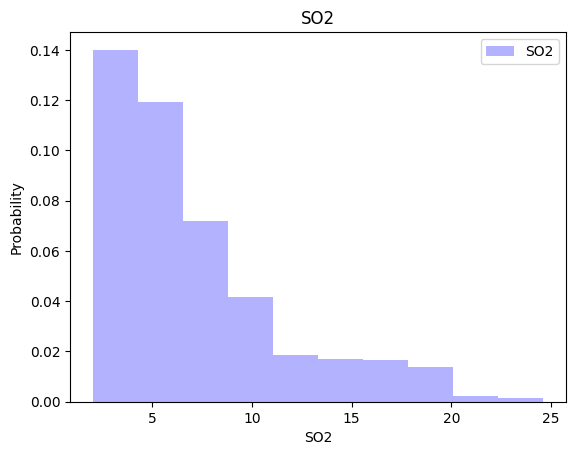

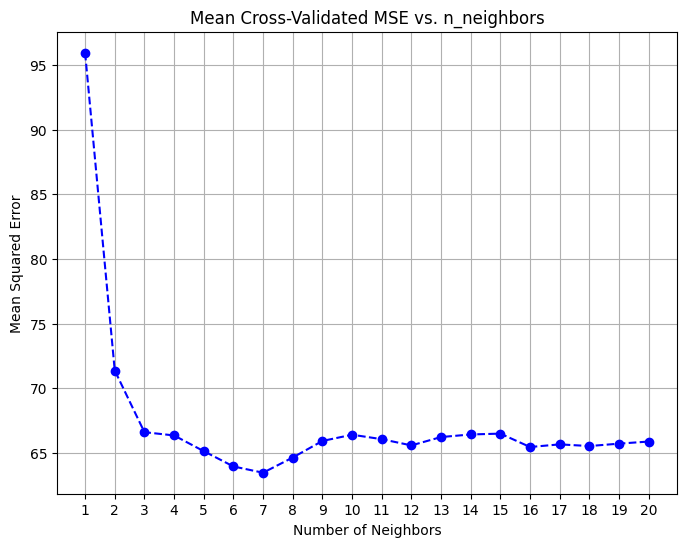

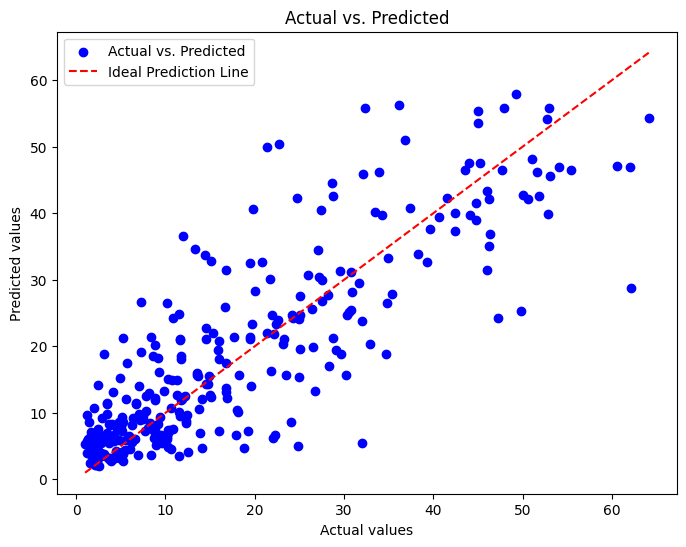

Custom Regression Report:
Mean Absolute Error: 5.93
Mean Squared Error: 69.47
R-squared (R2): 0.70


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/DATAML.csv')

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]

# Visualizations allow us to easily understand any patterns, trends, or outliers in a data set :)

cols = df.columns.tolist()    # Here we make a list with all labels names

for label in cols[:-1]:
  plt.hist(df[label], color='blue', label=label, alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of neighbors to search
param_grid = {
    'n_neighbors': range(1, 21)
}

# Create KNN model
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best number of neighbors
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Extract mean cross-validated MSE and corresponding n_neighbors
mean_mse = -grid_result.cv_results_['mean_test_score']
n_neighbors = range(1, 21)

# Plotting mean cross-validated MSE for different values of n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, mean_mse, marker='o', linestyle='dashed', color='blue')
plt.title('Mean Cross-Validated MSE vs. n_neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.xticks(n_neighbors)
plt.grid(True)
plt.show()

# Get the best hyperparameters found
best_n_neighbors = grid_result.best_params_['n_neighbors']

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")